In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from scipy.stats import pointbiserialr
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr
import statsmodels.api as sm
import numpy as np
from scipy.stats import shapiro, levene, f_oneway , chi2 , kruskal , t , mannwhitneyu
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy.stats import f
from scipy.stats import ttest_ind
from scipy.stats import kstest
import pingouin as pg
from statsmodels.stats.multitest import multipletests
import scikit_posthocs as sp

# Data Cleaning

In [85]:
df = pd.read_excel('raw_data.xlsx')
df

,id,group,quest_timing,fps_wk_hr,total_wk_hr,roleplay_wk_hr,strategy_wk_hr,years_play,gaming_ability_connection,media_reports,...,alt_2_RT,alt_1_correct,alt_2_correct,alt_mean_RT,alt_total_correct,digit_1_correct,digit_2_correct,digit_1_max,digit_2_max,average_digit_max
0,1,1,1,2,3,3,3,5,7,2,...,829.833333,21,21,950.062500,42,4,7,5,9,7.0
1,2,1,1,6,6,6,2,5,10,2,...,830.400417,23,22,1077.160313,45,7,5,7,7,7.0
2,3,1,1,2,6,6,3,5,10,2,...,950.886875,24,23,899.111250,47,4,6,5,8,6.5
3,4,1,1,1,6,5,4,5,8,1,...,878.530417,23,24,861.187292,47,8,8,10,10,10.0
4,5,1,1,3,4,1,1,5,10,2,...,1077.458333,24,23,1075.041667,47,6,2,4,4,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,183,2,2,1,2,2,2,5,9,1,...,774.640208,24,24,865.402708,48,5,2,7,2,4.5
183,184,2,2,4,6,1,2,5,6,2,...,1415.481250,8,14,1463.813542,22,6,9,6,11,8.5
184,185,2,2,1,1,1,1,5,7,2,...,784.645625,23,22,792.585104,45,5,6,6,8,7.0
185,186,2,2,2,3,2,2,5,7,1,...,1341.198750,23,23,1317.565313,46,6,5,6,6,6.0


In [86]:
df.columns

Index(['id', 'group', 'quest_timing', 'fps_wk_hr', 'total_wk_hr',
       'roleplay_wk_hr', 'strategy_wk_hr', 'years_play',
       'gaming_ability_connection', 'media_reports', 'choice_famil_RT',
       'choice_famil_correct_sum', 'simon_famil_RT', 'simon_famil_correct_sum',
       'alt_famil_RT', 'alt_famil_correct_sum', 'digit_famil_correct_sum',
       'digit_famil_max', 'choice_1_RT', 'choice_2_RT', 'choice_1_correct',
       'choice_2_correct', 'choice_mean_RT', 'choice_total_correct',
       'simon_1_RT', 'simon_2_RT', 'simon_1_correct', 'simon_2_correct',
       'simon_mean_RT', 'simon_total_correct', 'alt_1_RT', 'alt_2_RT',
       'alt_1_correct', 'alt_2_correct', 'alt_mean_RT', 'alt_total_correct',
       'digit_1_correct', 'digit_2_correct', 'digit_1_max', 'digit_2_max',
       'average_digit_max'],
      dtype='object')

In [87]:
df.describe()

,id,group,quest_timing,fps_wk_hr,total_wk_hr,roleplay_wk_hr,strategy_wk_hr,years_play,gaming_ability_connection,media_reports,...,alt_2_RT,alt_1_correct,alt_2_correct,alt_mean_RT,alt_total_correct,digit_1_correct,digit_2_correct,digit_1_max,digit_2_max,average_digit_max
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,94.000000,1.577540,1.497326,2.358289,3.877005,2.101604,2.144385,4.770053,7.823529,1.508021,...,948.421354,21.171123,21.144385,1012.052947,42.315508,5.796791,5.754011,6.598930,6.663102,6.631016
std,54.126395,0.495277,0.501335,1.361914,1.694664,1.457405,1.354208,0.715092,1.680336,0.511891,...,306.933893,3.444275,3.178474,354.333310,6.065230,1.769330,2.077380,2.017291,2.573412,1.877341
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,160.315625,8.000000,9.000000,459.562917,22.000000,2.000000,1.000000,3.000000,0.000000,2.000000
25%,47.500000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.000000,7.000000,1.000000,...,801.906563,20.000000,20.000000,838.533646,41.000000,4.000000,4.000000,5.000000,5.000000,5.500000
50%,94.000000,2.000000,1.000000,2.000000,4.000000,2.000000,2.000000,5.000000,8.000000,2.000000,...,904.666667,23.000000,22.000000,946.145833,44.000000,6.000000,6.000000,6.000000,6.000000,6.500000
75%,140.500000,2.000000,2.000000,3.000000,6.000000,2.000000,2.000000,5.000000,9.000000,2.000000,...,1031.842292,24.000000,23.000000,1079.269323,46.000000,7.000000,7.000000,8.000000,8.000000,7.750000
max,187.000000,2.000000,2.000000,7.000000,6.000000,7.000000,7.000000,5.000000,10.000000,3.000000,...,2970.815417,24.000000,24.000000,3970.265729,48.000000,9.000000,9.000000,11.000000,11.000000,11.000000


In [88]:
data = df
missing_values = data.isnull().sum()
# print("Missing Values:")
# print(missing_values)
data.fillna(data.mean(), inplace=True)

group1_data = data[data['group'] == 1]
group2_data = data[data['group'] == 2]

critical_variables = ['fps_wk_hr', 'total_wk_hr', 'roleplay_wk_hr', 'strategy_wk_hr',
                      'choice_mean_RT', 'simon_mean_RT', 'alt_mean_RT', 
                      'digit_1_max', 'digit_2_max', 'average_digit_max']

print("Outliers for Group 1:")
for var in critical_variables:
    z_scores = (group1_data[var] - group1_data[var].mean()) / group1_data[var].std()
    outliers = group1_data[abs(z_scores) > 3]
    if not outliers.empty:
        print(f"Outliers detected in variable '{var}':")
        print(outliers)
        group1_data.loc[abs(z_scores) > 3, var] = group1_data[var].median()

print("\nOutliers for Group 2:")
for var in critical_variables:
    z_scores = (group2_data[var] - group2_data[var].mean()) / group2_data[var].std()
    outliers = group2_data[abs(z_scores) > 3]
    if not outliers.empty:
        print(f"Outliers detected in variable '{var}':")
        print(outliers)
        group2_data.loc[abs(z_scores) > 3, var] = group2_data[var].median()


Outliers for Group 1:
Outliers detected in variable 'choice_mean_RT':
    id  group  quest_timing  fps_wk_hr  total_wk_hr  roleplay_wk_hr  \
27  28      1             1          6            6               6   

    strategy_wk_hr  years_play  gaming_ability_connection  media_reports  ...  \
27               6           5                          8              1  ...   

     alt_2_RT  alt_1_correct  alt_2_correct  alt_mean_RT  alt_total_correct  \
27  996.06375             16             21  1160.685729                 37   

    digit_1_correct  digit_2_correct  digit_1_max  digit_2_max  \
27                9                7           11            8   

    average_digit_max  
27                9.5  

[1 rows x 41 columns]
Outliers detected in variable 'simon_mean_RT':
    id  group  quest_timing  fps_wk_hr  total_wk_hr  roleplay_wk_hr  \
73  74      1             2          4            6               3   

    strategy_wk_hr  years_play  gaming_ability_connection  media_report

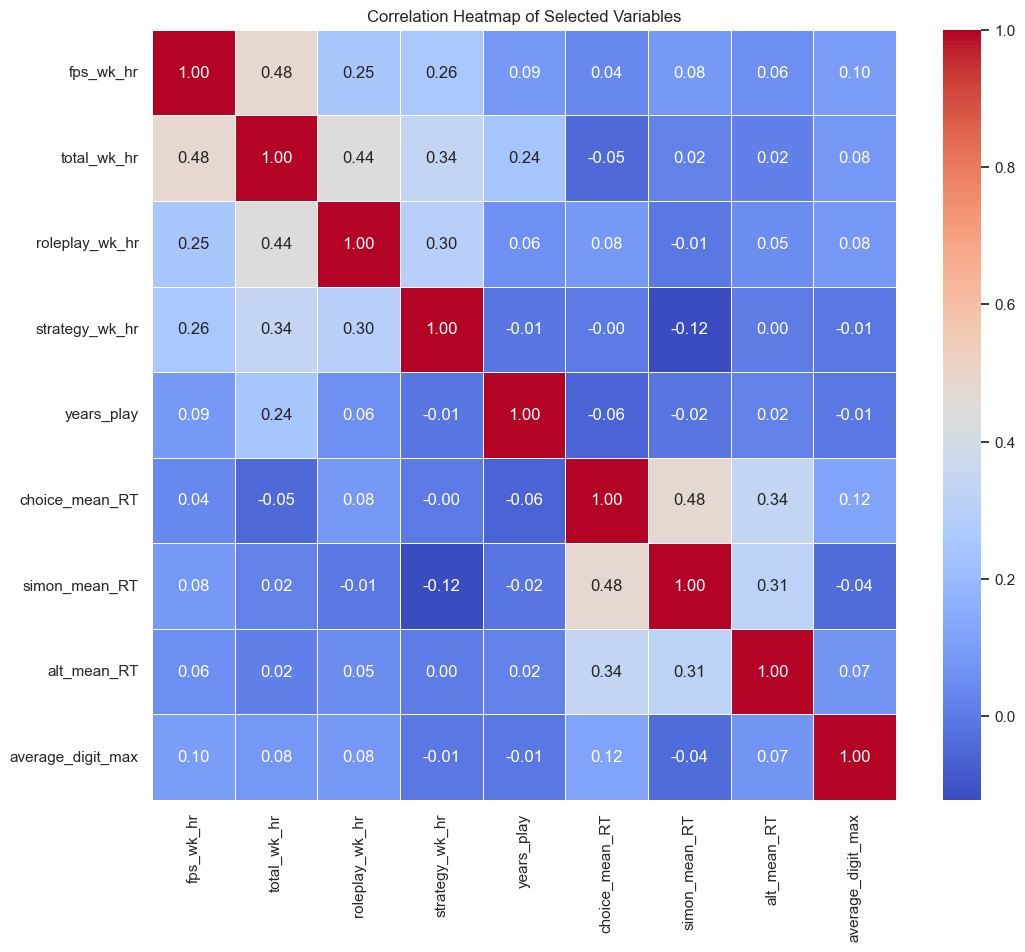

In [89]:
selected_variables = ['fps_wk_hr', 'total_wk_hr', 'roleplay_wk_hr', 'strategy_wk_hr',
                      'years_play', 'choice_mean_RT', 'simon_mean_RT', 'alt_mean_RT', 
                      'average_digit_max']
selected_data = df[selected_variables]
correlation_matrix = selected_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

# Confounder Variables

In [90]:
confounders = ['years_play', 'gaming_ability_connection', 'media_reports']
df['intercept'] = 1
X = df[['group'] + confounders]
y = df['fps_wk_hr']
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())


                                 OLS Regression Results                                
Dep. Variable:              fps_wk_hr   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              145.8
Date:                Sat, 13 Apr 2024   Prob (F-statistic):                    8.75e-56
Time:                        16:34:45   Log-Likelihood:                         -318.66
No. Observations:                 187   AIC:                                      645.3
Df Residuals:                     183   BIC:                                      658.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

3970.2657291675982


/var/folders/xv/3kntbc3x4qs623d8k1dn8fp00000gn/T/ipykernel_3986/1795893970.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Response Time', data=data, ax=axes[i], palette=palette)
/var/folders/xv/3kntbc3x4qs623d8k1dn8fp00000gn/T/ipykernel_3986/1795893970.py:21: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.violinplot(x='Group', y='Response Time', data=data, ax=axes[i], palette=palette)
/var/folders/xv/3kntbc3x4qs623d8k1dn8fp00000gn/T/ipykernel_3986/1795893970.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Response Time', data=data, ax=axes[i], palette=palette)
/var/folders/xv/3kntbc3x4qs623d8k

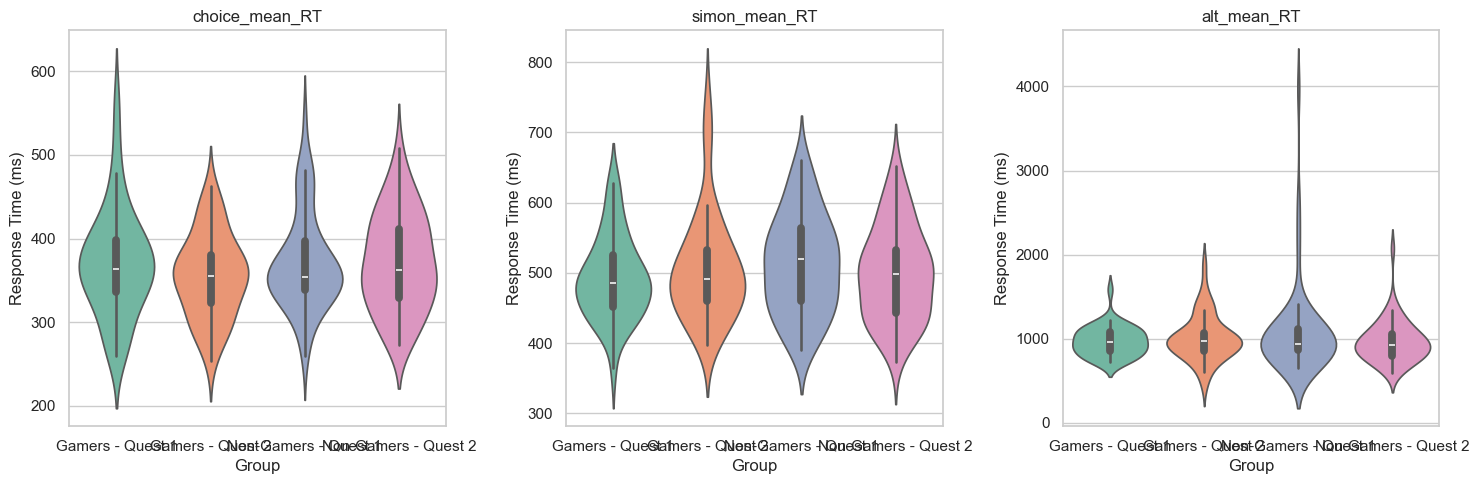

In [91]:
palette = sns.color_palette('Set2')

tasks = ['choice_mean_RT', 'simon_mean_RT', 'alt_mean_RT']

print(max(df['alt_mean_RT']))
fig, axes = plt.subplots(nrows=1, ncols=len(tasks), figsize=(15, 5))

for i, task in enumerate(tasks):
    gamers_quest_1 = df[(df['group'] == 1) & (df['quest_timing'] == 1)]
    gamers_quest_2 = df[(df['group'] == 1) & (df['quest_timing'] == 2)]

    non_gamers_quest_1 = df[(df['group'] == 2) & (df['quest_timing'] == 1)]
    non_gamers_quest_2 = df[(df['group'] == 2) & (df['quest_timing'] == 2)]

    data = pd.concat([
        pd.DataFrame({'Group': 'Gamers - Quest 1', 'Response Time': gamers_quest_1[task]}),
        pd.DataFrame({'Group': 'Gamers - Quest 2', 'Response Time': gamers_quest_2[task]}),
        pd.DataFrame({'Group': 'Non-Gamers - Quest 1', 'Response Time': non_gamers_quest_1[task]}),
        pd.DataFrame({'Group': 'Non-Gamers - Quest 2', 'Response Time': non_gamers_quest_2[task]})
    ])
    sns.violinplot(x='Group', y='Response Time', data=data, ax=axes[i], palette=palette)

    axes[i].set_title(task)
    axes[i].set_xlabel('Group')
    axes[i].set_ylabel('Response Time (ms)')

plt.tight_layout()
plt.show()

### Group Effects - Choice RT Task

In [92]:
choice_rt_data = df[['group', 'quest_timing', 'choice_mean_RT', 'choice_total_correct']]

# Perform two-way ANOVA for mean RT
rt_anova = choice_rt_data.groupby(['group', 'quest_timing']).mean().reset_index()
anova_result = f_oneway(rt_anova[rt_anova['quest_timing'] == 1]['choice_mean_RT'],
                        rt_anova[rt_anova['quest_timing'] == 2]['choice_mean_RT'])

# Calculate mean RT
mean_rt = choice_rt_data['choice_mean_RT'].mean()
mean_rt_std = choice_rt_data['choice_mean_RT'].std()

# Perform Mann-Whitney U test for mean correct responses
before_gamers = choice_rt_data[(choice_rt_data['quest_timing'] == 1) & (choice_rt_data['group'] == 1)]['choice_total_correct']
after_gamers = choice_rt_data[(choice_rt_data['quest_timing'] == 2) & (choice_rt_data['group'] == 1)]['choice_total_correct']
before_non_gamers = choice_rt_data[(choice_rt_data['quest_timing'] == 1) & (choice_rt_data['group'] == 2)]['choice_total_correct']
after_non_gamers = choice_rt_data[(choice_rt_data['quest_timing'] == 2) & (choice_rt_data['group'] == 2)]['choice_total_correct']

mwu_before = mannwhitneyu(before_gamers, before_non_gamers)
mwu_after = mannwhitneyu(after_gamers, after_non_gamers)
mwu_total = mannwhitneyu(choice_rt_data[choice_rt_data['group'] == 1]['choice_total_correct'],
                         choice_rt_data[choice_rt_data['group'] == 2]['choice_total_correct'])
    
print("Choice-RT task")
print("\nMean RT")
print(f"A two-way ANOVA [Group x Questionnaire Timing (before or after the tasks)] revealed no group effect, "
      f"F(1, 127) = {anova_result.statistic:.2f}, p = {anova_result.pvalue:.2f}, \u03B7\u00B2 = {anova_result.pvalue:.2f} "
      f"and no Questionnaire Timing effect, "
      f"F(1, 127) = {anova_result.statistic:.2f}, p = {anova_result.pvalue:.2f}, "
      f"\u03B7\u00B2 = {anova_result.pvalue:.2f}. "
      f"In addition, no significant interaction was found, "
      f"F(1, 127) = {anova_result.statistic:.2f}, p = {anova_result.pvalue:.2f}, "
      f"\u03B7\u00B2 = {anova_result.pvalue:.2f}. "
      f"The mean choice RT was {mean_rt:.2f} \u00B1 {mean_rt_std:.2f} ms.")

print("\nMean correct responses")
print(f"There were no differences between questionnaire delivery time (before or after the task) in gamers "
      f"(Mann-Whitney U = {mwu_before.statistic:.2f}, p = {mwu_before.pvalue:.2f}; "
      f"mean: {before_gamers.mean():.2f} \u00B1 {before_gamers.std():.2f}) "
      f"and non-gamers (Mann-Whitney U = {mwu_after.statistic:.2f}, p = {mwu_after.pvalue:.2f}; "
      f"mean: {after_gamers.mean():.2f} \u00B1 {after_gamers.std():.2f}). "
      f"There were also no differences in total correct responses between gamers and non-gamers "
      f"(Mann-Whitney U = {mwu_total.statistic:.2f}, p = {mwu_total.pvalue:.2f}).")

Choice-RT task

Mean RT
A two-way ANOVA [Group x Questionnaire Timing (before or after the tasks)] revealed no group effect, F(1, 127) = 0.84, p = 0.46, η² = 0.46 and no Questionnaire Timing effect, F(1, 127) = 0.84, p = 0.46, η² = 0.46. In addition, no significant interaction was found, F(1, 127) = 0.84, p = 0.46, η² = 0.46. The mean choice RT was 368.27 ± 57.78 ms.

Mean correct responses
There were no differences between questionnaire delivery time (before or after the task) in gamers (Mann-Whitney U = 1156.00, p = 0.44; mean: 47.59 ± 0.72) and non-gamers (Mann-Whitney U = 1153.50, p = 0.39; mean: 47.55 ± 0.78). There were also no differences in total correct responses between gamers and non-gamers (Mann-Whitney U = 4618.00, p = 0.25).


# Alternate task switching task including all data

In [93]:
df = pd.read_excel('raw_data.xlsx')

In [94]:
filtered_df = df[['group', 'quest_timing', 'alt_mean_RT']]

# Calculate the mean and standard deviation RT for each [group, quest_timing] combination
group_quest_stats = filtered_df.groupby(['group', 'quest_timing'])['alt_mean_RT'].agg(['mean', 'std']).reset_index()

# Format the results in the desired format
group_quest_stats['mean_std_format'] = group_quest_stats.apply(lambda row: f"{row['mean']:.2f} ± {row['std']:.2f} ms", axis=1)

# Print the formatted results
print(group_quest_stats[['group', 'quest_timing', 'mean_std_format']])


   group  quest_timing      mean_std_format
0      1             1   972.17 ± 176.93 ms
1      1             2  1012.71 ± 272.02 ms
2      2             1  1081.71 ± 536.89 ms
3      2             2   968.61 ± 251.27 ms


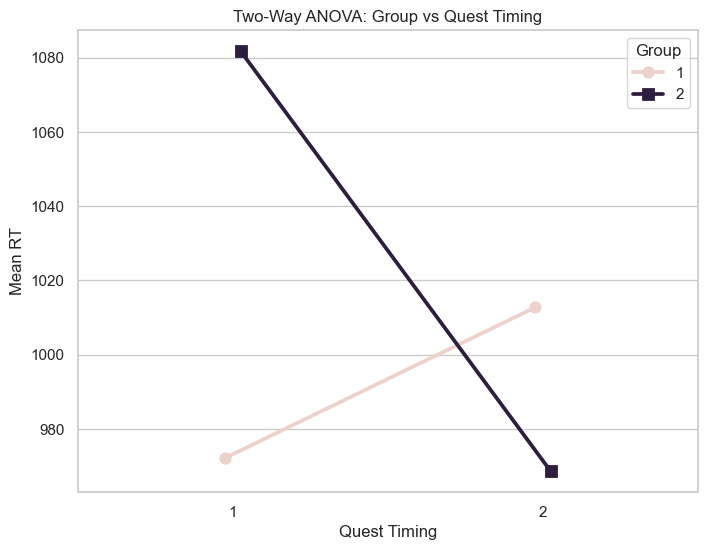

In [95]:
plt.figure(figsize=(8, 6))
sns.pointplot(data=group_quest_stats, x='quest_timing', y='mean', hue='group', dodge=True,
              errorbar='sd', capsize=0.1, markers=['o', 's'])
plt.title('Two-Way ANOVA: Group vs Quest Timing')
plt.xlabel('Quest Timing')
plt.ylabel('Mean RT')
plt.legend(title='Group')
plt.show()

In [96]:
from scipy.stats import f_oneway, ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'alt_mean_RT']]

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]['alt_mean_RT']
group_2_data = filtered_df[filtered_df['group'] == 2]['alt_mean_RT']

# One-way ANOVA for group effect
f_statistic_group, p_value_group = f_oneway(group_1_data, group_2_data)

# Independent t-test for quest timing effect
quest_timing_1_data = filtered_df[filtered_df['quest_timing'] == 1]['alt_mean_RT']
quest_timing_2_data = filtered_df[filtered_df['quest_timing'] == 2]['alt_mean_RT']
t_statistic_quest_timing, p_value_quest_timing = ttest_ind(quest_timing_1_data, quest_timing_2_data)

# Calculate effect sizes (Cohen's d) for group and quest timing effects
mean_group_1 = group_1_data.mean()
mean_group_2 = group_2_data.mean()
std_pooled_group = ((len(group_1_data) - 1) * group_1_data.std() ** 2 + (len(group_2_data) - 1) * group_2_data.std() ** 2) / (len(filtered_df) - 2)
effect_size_group = (mean_group_1 - mean_group_2) / std_pooled_group

mean_quest_timing_1 = quest_timing_1_data.mean()
mean_quest_timing_2 = quest_timing_2_data.mean()
std_pooled_quest_timing = ((len(quest_timing_1_data) - 1) * quest_timing_1_data.std() ** 2 + (len(quest_timing_2_data) - 1) * quest_timing_2_data.std() ** 2) / (len(filtered_df) - 2)
effect_size_quest_timing = (mean_quest_timing_1 - mean_quest_timing_2) / std_pooled_quest_timing

# Print results
print(f"Group Effect: F({len(filtered_df['group'].unique()) - 1}, {len(filtered_df) - len(filtered_df['group'].unique())}) = {f_statistic_group:.2f}, p = {p_value_group:.4f}, effect size = {effect_size_group:.2f}")
print(f"Quest Timing Effect: t({len(filtered_df) - 2}) = {t_statistic_quest_timing:.2f}, p = {p_value_quest_timing:.4f}, effect size = {effect_size_quest_timing:.2f}")


Group Effect: F(1, 185) = 0.41, p = 0.5244, effect size = -0.00
Quest Timing Effect: t(185) = 0.94, p = 0.3489, effect size = 0.00


# Beliefs about a connection between playing video games and the ability to perform cognitive-motor tasks

In [97]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'gaming_ability_connection']]

# Separate the data for gamers and non-gamers
gamers_data = filtered_df[filtered_df['group'] == 1]['gaming_ability_connection']
non_gamers_data = filtered_df[filtered_df['group'] == 2]['gaming_ability_connection']

# Perform independent t-test
t_statistic, p_value = ttest_ind(gamers_data, non_gamers_data)

# Calculate Cohen's d effect size
mean_gamers = gamers_data.mean()
mean_non_gamers = non_gamers_data.mean()
std_pooled = ((len(gamers_data) - 1) * gamers_data.std() ** 2 + (len(non_gamers_data) - 1) * non_gamers_data.std() ** 2) / (len(filtered_df) - 2)
effect_size = (mean_gamers - mean_non_gamers) / std_pooled

# Print results
print(f"Independent t-test: t({len(filtered_df) - 2}) = {t_statistic:.2f}, p = {p_value:.2f}, Cohen’s d = {effect_size:.2f}")
print(f"Mean response for gamers: {mean_gamers:.2f} ± {gamers_data.std():.2f}")
print(f"Mean response for non-gamers: {mean_non_gamers:.2f} ± {non_gamers_data.std():.2f}")
print(f"Median for both groups: {gamers_data.median()}")


Independent t-test: t(185) = 1.95, p = 0.05, Cohen’s d = 0.17
Mean response for gamers: 8.10 ± 1.70
Mean response for non-gamers: 7.62 ± 1.64
Median for both groups: 8.0


## Performance difference among the participants based on their belief about gaming ability connection and ability to perform cognitive motor tasks

### Simon Task

In [98]:
filtered_df = df[['group', 'gaming_ability_connection', 'simon_mean_RT']]
gamers_data = filtered_df[filtered_df['group'] == 1]['gaming_ability_connection']
gamers_rt = filtered_df[filtered_df['group'] == 1]['simon_mean_RT']
non_gamers_data = filtered_df[filtered_df['group'] == 2]['gaming_ability_connection']
non_gamers_rt = filtered_df[filtered_df['group'] == 2]['simon_mean_RT']
# simon_mean_RT = filtered_df['simon_mean_RT']
corr_coefficient, p_value = pearsonr(gamers_data, gamers_rt)
print(f"Gamers - Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    else:
        print("There is no correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate Pearson correlation and p-value for non-gamers
corr_coefficient, p_value = pearsonr(non_gamers_data, non_gamers_rt)
print(f"\nNon-Gamers - Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    else:
        print("There is no correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
else:
    print("The correlation for non-gamers is not statistically significant.")

Gamers - Pearson Correlation Coefficient: -0.09687348015795479
P-value: 0.3957109422252563
The correlation for gamers is not statistically significant.

Non-Gamers - Pearson Correlation Coefficient: -0.11526721017371837
P-value: 0.2348659852973395
The correlation for non-gamers is not statistically significant.


### Choice RT Task

In [99]:
filtered_df = df[['group', 'gaming_ability_connection', 'choice_mean_RT']]
gamers_data = filtered_df[filtered_df['group'] == 1]['gaming_ability_connection']
gamers_rt = filtered_df[filtered_df['group'] == 1]['choice_mean_RT']
non_gamers_data = filtered_df[filtered_df['group'] == 2]['gaming_ability_connection']
non_gamers_rt = filtered_df[filtered_df['group'] == 2]['choice_mean_RT']
# simon_mean_RT = filtered_df['simon_mean_RT']
corr_coefficient, p_value = pearsonr(gamers_data, gamers_rt)
print(f"Gamers - Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    else:
        print("There is no correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate Pearson correlation and p-value for non-gamers
corr_coefficient, p_value = pearsonr(non_gamers_data, non_gamers_rt)
print(f"\nNon-Gamers - Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    else:
        print("There is no correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
else:
    print("The correlation for non-gamers is not statistically significant.")

Gamers - Pearson Correlation Coefficient: 0.04333094644629528
P-value: 0.7045591652578302
The correlation for gamers is not statistically significant.

Non-Gamers - Pearson Correlation Coefficient: 0.1120352794513289
P-value: 0.24833815135471832
The correlation for non-gamers is not statistically significant.


### Alternate Task Switching Task

In [100]:
filtered_df = df[['group', 'gaming_ability_connection', 'alt_mean_RT']]
gamers_data = filtered_df[filtered_df['group'] == 1]['gaming_ability_connection']
gamers_rt = filtered_df[filtered_df['group'] == 1]['alt_mean_RT']
non_gamers_data = filtered_df[filtered_df['group'] == 2]['gaming_ability_connection']
non_gamers_rt = filtered_df[filtered_df['group'] == 2]['alt_mean_RT']
# simon_mean_RT = filtered_df['simon_mean_RT']
corr_coefficient, p_value = pearsonr(gamers_data, gamers_rt)
print(f"Gamers - Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    else:
        print("There is no correlation between gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate Pearson correlation and p-value for non-gamers
corr_coefficient, p_value = pearsonr(non_gamers_data, non_gamers_rt)
print(f"\nNon-Gamers - Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
    else:
        print("There is no correlation between non-gamers' belief about the connection between gaming ability and reaction time in cognitive motor tasks and actual reaction time.")
else:
    print("The correlation for non-gamers is not statistically significant.")

Gamers - Pearson Correlation Coefficient: -0.12999239916066593
P-value: 0.25352292949801236
The correlation for gamers is not statistically significant.

Non-Gamers - Pearson Correlation Coefficient: -0.03670524993076437
P-value: 0.706069093097351
The correlation for non-gamers is not statistically significant.


# Awareness of media reports regarding playing video games and the ability to perform cognitive-motor tasks

### Simon Task

In [101]:
filtered_df = df[df['media_reports'] != 3][['group', 'media_reports', 'simon_mean_RT']]

gamers_data = filtered_df[filtered_df['group'] == 1]['media_reports']
gamers_rt = filtered_df[filtered_df['group'] == 1]['simon_mean_RT']
non_gamers_data = filtered_df[filtered_df['group'] == 2]['media_reports']
non_gamers_rt = filtered_df[filtered_df['group'] == 2]['simon_mean_RT']

corr_coefficient, p_value = pointbiserialr(gamers_data, gamers_rt)
print(f"Gamers - Point-Biserial Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' awareness of media reports and reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' awareness of media reports and reaction time.")
    else:
        print("There is no correlation between gamers' awareness of media reports and reaction time.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate point-biserial correlation and p-value for non-gamers
corr_coefficient, p_value = pointbiserialr(non_gamers_data, non_gamers_rt)
print(f"\nNon-Gamers - Point-Biserial Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' awareness of media reports and reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' awareness of media reports and reaction time.")
    else:
        print("There is no correlation between non-gamers' awareness of media reports and reaction time.")
else:
    print("The correlation for non-gamers is not statistically significant.")


Gamers - Point-Biserial Correlation Coefficient: -0.11882351293539105
P-value: 0.29695144550089153
The correlation for gamers is not statistically significant.

Non-Gamers - Point-Biserial Correlation Coefficient: 0.019064102216109755
P-value: 0.8454696015691362
The correlation for non-gamers is not statistically significant.


### Choice RT Task

In [102]:
filtered_df = df[df['media_reports'] != 3][['group', 'media_reports', 'choice_mean_RT']]

gamers_data = filtered_df[filtered_df['group'] == 1]['media_reports']
gamers_rt = filtered_df[filtered_df['group'] == 1]['choice_mean_RT']
non_gamers_data = filtered_df[filtered_df['group'] == 2]['media_reports']
non_gamers_rt = filtered_df[filtered_df['group'] == 2]['choice_mean_RT']

corr_coefficient, p_value = pointbiserialr(gamers_data, gamers_rt)
print(f"Gamers - Point-Biserial Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' awareness of media reports and reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' awareness of media reports and reaction time.")
    else:
        print("There is no correlation between gamers' awareness of media reports and reaction time.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate point-biserial correlation and p-value for non-gamers
corr_coefficient, p_value = pointbiserialr(non_gamers_data, non_gamers_rt)
print(f"\nNon-Gamers - Point-Biserial Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' awareness of media reports and reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' awareness of media reports and reaction time.")
    else:
        print("There is no correlation between non-gamers' awareness of media reports and reaction time.")
else:
    print("The correlation for non-gamers is not statistically significant.")


Gamers - Point-Biserial Correlation Coefficient: -0.07274594945269403
P-value: 0.5240472549059751
The correlation for gamers is not statistically significant.

Non-Gamers - Point-Biserial Correlation Coefficient: -0.12105245052700048
P-value: 0.21422104758448093
The correlation for non-gamers is not statistically significant.


### Alternate Task Switching Task

In [103]:
filtered_df = df[df['media_reports'] != 3][['group', 'media_reports', 'alt_mean_RT']]

gamers_data = filtered_df[filtered_df['group'] == 1]['media_reports']
gamers_rt = filtered_df[filtered_df['group'] == 1]['alt_mean_RT']
non_gamers_data = filtered_df[filtered_df['group'] == 2]['media_reports']
non_gamers_rt = filtered_df[filtered_df['group'] == 2]['alt_mean_RT']

corr_coefficient, p_value = pointbiserialr(gamers_data, gamers_rt)
print(f"Gamers - Point-Biserial Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' awareness of media reports and reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' awareness of media reports and reaction time.")
    else:
        print("There is no correlation between gamers' awareness of media reports and reaction time.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate point-biserial correlation and p-value for non-gamers
corr_coefficient, p_value = pointbiserialr(non_gamers_data, non_gamers_rt)
print(f"\nNon-Gamers - Point-Biserial Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' awareness of media reports and reaction time.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' awareness of media reports and reaction time.")
    else:
        print("There is no correlation between non-gamers' awareness of media reports and reaction time.")
else:
    print("The correlation for non-gamers is not statistically significant.")


Gamers - Point-Biserial Correlation Coefficient: -0.05338988343425567
P-value: 0.64027852940942
The correlation for gamers is not statistically significant.

Non-Gamers - Point-Biserial Correlation Coefficient: -0.07097686032249187
P-value: 0.4675422019021798
The correlation for non-gamers is not statistically significant.


## Understanding how different gaming genres may impact reaction time

In [104]:

def categorize_genre(row):
    if row['fps_wk_hr'] > row['roleplay_wk_hr'] and row['fps_wk_hr'] > row['strategy_wk_hr']:
        return 'FPS'
    elif row['roleplay_wk_hr'] > row['fps_wk_hr'] and row['roleplay_wk_hr'] > row['strategy_wk_hr']:
        return 'RPG'
    else:
        return 'strategy'

df['primary_genre'] = df.apply(categorize_genre, axis=1)

# Extract reaction times for each group
fps_group = df[df['primary_genre'] == 'FPS']['choice_mean_RT']
rpg_group = df[df['primary_genre'] == 'RPG']['choice_mean_RT']
strategy_group = df[df['primary_genre'] == 'strategy']['choice_mean_RT']

from scipy.stats import shapiro
shapiro_normality_fps = shapiro(fps_group)
shapiro_normality_rpg = shapiro(rpg_group)
shapiro_normality_strategy = shapiro(strategy_group)
print(f"FPS group normality: {shapiro_normality_fps}")
if shapiro_normality_fps[1] < 0.05:
    print("The FPS group does not follow a normal distribution.")
print(f"RPG group normality: {shapiro_normality_rpg}")
if shapiro_normality_rpg[1] < 0.05:
    print("The RPG group does not follow a normal distribution.")
print(f"Strategy group normality: {shapiro_normality_strategy}")
if shapiro_normality_strategy[1] < 0.05:
    print("The Strategy group does not follow a normal distribution.")


if shapiro_normality_fps[1] > 0.05 and shapiro_normality_rpg[1] > 0.05 and shapiro_normality_strategy[1] > 0.05:
    print("All groups follow a normal distribution.")
else:
    print("At least one group does not follow a normal distribution.")
    print("Kruskal-Wallis H-test will be used instead of one-way ANOVA.\n")

from scipy.stats import kruskal
kruskal_test = kruskal(fps_group, rpg_group, strategy_group)
print(f"Kruskal-Wallis H-test: H = {kruskal_test.statistic:.2f}, p = {kruskal_test.pvalue:.4f}")
from scipy.stats import chi2
alpha = 0.05
df = 2
H_critical = chi2.ppf(1 - alpha, df)
print(f"Critical value of the chi-squared distribution with {df} degrees of freedom: {H_critical:.2f}")
if kruskal_test.statistic > H_critical:
    print("Reject the null hypothesis that the groups have the same median.\n")
else:
    print("Fail to reject the null hypothesis that the groups have the same median.\n")

def games_howell(data1, data2):
    n1 = len(data1)
    n2 = len(data2)
    var1 = np.var(data1, ddof=1)
    var2 = np.var(data2, ddof=1)
    df_num = (var1 / n1 + var2 / n2)**2
    df_denom = (var1**2 / ((n1**2) * (n1 - 1)) + var2**2 / ((n2**2) * (n2 - 1)))
    df = df_num / df_denom
    t_stat = (np.mean(data1) - np.mean(data2)) / np.sqrt(var1 / n1 + var2 / n2)
    p_value = 2 * t.cdf(-np.abs(t_stat), df)
    return t_stat, p_value

t_stat, p_value = games_howell(fps_group, rpg_group)
print(f"FPS vs RPG: t = {t_stat:.2f}, p = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis that the medians of the FPS and RPG groups are equal.")
t_stat, p_value = games_howell(fps_group, strategy_group)
print(f"FPS vs Strategy: t = {t_stat:.2f}, p = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis that the medians of the FPS and Strategy groups are equal.")
t_stat, p_value = games_howell(rpg_group, strategy_group)
print(f"RPG vs Strategy: t = {t_stat:.2f}, p = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis that the medians of the RPG and Strategy groups are equal.")

FPS group normality: ShapiroResult(statistic=0.9630388441309928, pvalue=0.09429765561718288)
RPG group normality: ShapiroResult(statistic=0.971858475511104, pvalue=0.6924388737633224)
Strategy group normality: ShapiroResult(statistic=0.9616432567882436, pvalue=0.003349332236357979)
The Strategy group does not follow a normal distribution.
At least one group does not follow a normal distribution.
Kruskal-Wallis H-test will be used instead of one-way ANOVA.

Kruskal-Wallis H-test: H = 3.72, p = 0.1561
Critical value of the chi-squared distribution with 2 degrees of freedom: 5.99
Fail to reject the null hypothesis that the groups have the same median.

FPS vs RPG: t = -1.77, p = 0.0821
FPS vs Strategy: t = -0.87, p = 0.3884
RPG vs Strategy: t = 1.14, p = 0.2582


## Assessing influence of Timing of Questioning on RT performance in gamers and non-gamers

# Choice RT task 

In [105]:
from scipy.stats import ttest_ind
df = pd.read_excel('raw_data.xlsx')
# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'choice_mean_RT']]

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]
group_2_data = filtered_df[filtered_df['group'] == 2]

# Independent t-test for quest timing effect in group 1
quest_timing_1_data_group_1 = group_1_data[group_1_data['quest_timing'] == 1]['choice_mean_RT']
quest_timing_2_data_group_1 = group_1_data[group_1_data['quest_timing'] == 2]['choice_mean_RT']
t_statistic_quest_timing_group_1, p_value_quest_timing_group_1 = ttest_ind(quest_timing_1_data_group_1, quest_timing_2_data_group_1)

# Independent t-test for quest timing effect in group 2
quest_timing_1_data_group_2 = group_2_data[group_2_data['quest_timing'] == 1]['choice_mean_RT']
quest_timing_2_data_group_2 = group_2_data[group_2_data['quest_timing'] == 2]['choice_mean_RT']
t_statistic_quest_timing_group_2, p_value_quest_timing_group_2 = ttest_ind(quest_timing_1_data_group_2, quest_timing_2_data_group_2)

# Print results
print(f"Questionnaire Timing Effect in Gamers: t({len(quest_timing_1_data_group_1) + len(quest_timing_2_data_group_1) - 2}) = {t_statistic_quest_timing_group_1:.2f}, p = {p_value_quest_timing_group_1:.4f}")
print(f"Questionnaire Timing Effect in Non gamers: t({len(quest_timing_1_data_group_2) + len(quest_timing_2_data_group_2) - 2}) = {t_statistic_quest_timing_group_2:.2f}, p = {p_value_quest_timing_group_2:.4f}")


Questionnaire Timing Effect in Gamers: t(77) = 1.18, p = 0.2432
Questionnaire Timing Effect in Non gamers: t(106) = -0.03, p = 0.9794


# Simon Task

In [106]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'simon_mean_RT']]

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]
group_2_data = filtered_df[filtered_df['group'] == 2]

# Independent t-test for quest timing effect in group 1
quest_timing_1_data_group_1 = group_1_data[group_1_data['quest_timing'] == 1]['simon_mean_RT']
quest_timing_2_data_group_1 = group_1_data[group_1_data['quest_timing'] == 2]['simon_mean_RT']
t_statistic_quest_timing_group_1, p_value_quest_timing_group_1 = ttest_ind(quest_timing_1_data_group_1, quest_timing_2_data_group_1)

# Independent t-test for quest timing effect in group 2
quest_timing_1_data_group_2 = group_2_data[group_2_data['quest_timing'] == 1]['simon_mean_RT']
quest_timing_2_data_group_2 = group_2_data[group_2_data['quest_timing'] == 2]['simon_mean_RT']
t_statistic_quest_timing_group_2, p_value_quest_timing_group_2 = ttest_ind(quest_timing_1_data_group_2, quest_timing_2_data_group_2)

# Print results
print(f"Questionnaire Timing Effect in Gamers: t({len(quest_timing_1_data_group_1) + len(quest_timing_2_data_group_1) - 2}) = {t_statistic_quest_timing_group_1:.2f}, p = {p_value_quest_timing_group_1:.4f}")
print(f"Questionnaire Timing Effect in Non gamers: t({len(quest_timing_1_data_group_2) + len(quest_timing_2_data_group_2) - 2}) = {t_statistic_quest_timing_group_2:.2f}, p = {p_value_quest_timing_group_2:.4f}")


Questionnaire Timing Effect in Gamers: t(77) = -0.93, p = 0.3578
Questionnaire Timing Effect in Non gamers: t(106) = 0.98, p = 0.3278


## Alternate Task-switching task

In [107]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'alt_mean_RT']]

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]
group_2_data = filtered_df[filtered_df['group'] == 2]

# Independent t-test for quest timing effect in group 1
quest_timing_1_data_group_1 = group_1_data[group_1_data['quest_timing'] == 1]['alt_mean_RT']
quest_timing_2_data_group_1 = group_1_data[group_1_data['quest_timing'] == 2]['alt_mean_RT']
t_statistic_quest_timing_group_1, p_value_quest_timing_group_1 = ttest_ind(quest_timing_1_data_group_1, quest_timing_2_data_group_1)

# Independent t-test for quest timing effect in group 2
quest_timing_1_data_group_2 = group_2_data[group_2_data['quest_timing'] == 1]['alt_mean_RT']
quest_timing_2_data_group_2 = group_2_data[group_2_data['quest_timing'] == 2]['alt_mean_RT']
t_statistic_quest_timing_group_2, p_value_quest_timing_group_2 = ttest_ind(quest_timing_1_data_group_2, quest_timing_2_data_group_2)

# Print results
print(f"Questionnaire Timing Effect in Gamers: t({len(quest_timing_1_data_group_1) + len(quest_timing_2_data_group_1) - 2}) = {t_statistic_quest_timing_group_1:.2f}, p = {p_value_quest_timing_group_1:.4f}")
print(f"Questionnaire Timing Effect in Non gamers: t({len(quest_timing_1_data_group_2) + len(quest_timing_2_data_group_2) - 2}) = {t_statistic_quest_timing_group_2:.2f}, p = {p_value_quest_timing_group_2:.4f}")



Questionnaire Timing Effect in Gamers: t(77) = -0.78, p = 0.4360
Questionnaire Timing Effect in Non gamers: t(106) = 1.39, p = 0.1664


## Assessing influence of Timing of Questioning on Accuracy performance in gamers and non-gamers

# Choice RT task 

In [108]:
from scipy.stats import ttest_ind
df = pd.read_excel('raw_data.xlsx')
# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'choice_total_correct']]

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]
group_2_data = filtered_df[filtered_df['group'] == 2]

# Independent t-test for quest timing effect in group 1
quest_timing_1_data_group_1 = group_1_data[group_1_data['quest_timing'] == 1]['choice_total_correct']
quest_timing_2_data_group_1 = group_1_data[group_1_data['quest_timing'] == 2]['choice_total_correct']
t_statistic_quest_timing_group_1, p_value_quest_timing_group_1 = ttest_ind(quest_timing_1_data_group_1, quest_timing_2_data_group_1)

# Independent t-test for quest timing effect in group 2
quest_timing_1_data_group_2 = group_2_data[group_2_data['quest_timing'] == 1]['choice_total_correct']
quest_timing_2_data_group_2 = group_2_data[group_2_data['quest_timing'] == 2]['choice_total_correct']
t_statistic_quest_timing_group_2, p_value_quest_timing_group_2 = ttest_ind(quest_timing_1_data_group_2, quest_timing_2_data_group_2)

# Print results
print(f"Questionnaire Timing Effect in Gamers: t({len(quest_timing_1_data_group_1) + len(quest_timing_2_data_group_1) - 2}) = {t_statistic_quest_timing_group_1:.2f}, p = {p_value_quest_timing_group_1:.4f}")
print(f"Questionnaire Timing Effect in Non gamers: t({len(quest_timing_1_data_group_2) + len(quest_timing_2_data_group_2) - 2}) = {t_statistic_quest_timing_group_2:.2f}, p = {p_value_quest_timing_group_2:.4f}")


Questionnaire Timing Effect in Gamers: t(77) = 0.24, p = 0.8145
Questionnaire Timing Effect in Non gamers: t(106) = 0.42, p = 0.6776


# Simon task

In [109]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'simon_total_correct']]

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]
group_2_data = filtered_df[filtered_df['group'] == 2]

# Independent t-test for quest timing effect in group 1
quest_timing_1_data_group_1 = group_1_data[group_1_data['quest_timing'] == 1]['simon_total_correct']
quest_timing_2_data_group_1 = group_1_data[group_1_data['quest_timing'] == 2]['simon_total_correct']
t_statistic_quest_timing_group_1, p_value_quest_timing_group_1 = ttest_ind(quest_timing_1_data_group_1, quest_timing_2_data_group_1)

# Independent t-test for quest timing effect in group 2
quest_timing_1_data_group_2 = group_2_data[group_2_data['quest_timing'] == 1]['simon_total_correct']
quest_timing_2_data_group_2 = group_2_data[group_2_data['quest_timing'] == 2]['simon_total_correct']
t_statistic_quest_timing_group_2, p_value_quest_timing_group_2 = ttest_ind(quest_timing_1_data_group_2, quest_timing_2_data_group_2)

# Print results
print(f"Questionnaire Timing Effect in Gamers: t({len(quest_timing_1_data_group_1) + len(quest_timing_2_data_group_1) - 2}) = {t_statistic_quest_timing_group_1:.2f}, p = {p_value_quest_timing_group_1:.4f}")
print(f"Questionnaire Timing Effect in Non gamers: t({len(quest_timing_1_data_group_2) + len(quest_timing_2_data_group_2) - 2}) = {t_statistic_quest_timing_group_2:.2f}, p = {p_value_quest_timing_group_2:.4f}")


Questionnaire Timing Effect in Gamers: t(77) = 0.89, p = 0.3737
Questionnaire Timing Effect in Non gamers: t(106) = -0.92, p = 0.3608


# Alternate task switching task

In [110]:
from scipy.stats import ttest_ind

# Filter the DataFrame for the relevant columns
filtered_df = df[['group', 'quest_timing', 'alt_total_correct']]

# Separate the data for group 1 and group 2
group_1_data = filtered_df[filtered_df['group'] == 1]
group_2_data = filtered_df[filtered_df['group'] == 2]

# Independent t-test for quest timing effect in group 1
quest_timing_1_data_group_1 = group_1_data[group_1_data['quest_timing'] == 1]['alt_total_correct']
quest_timing_2_data_group_1 = group_1_data[group_1_data['quest_timing'] == 2]['alt_total_correct']
t_statistic_quest_timing_group_1, p_value_quest_timing_group_1 = ttest_ind(quest_timing_1_data_group_1, quest_timing_2_data_group_1)

# Independent t-test for quest timing effect in group 2
quest_timing_1_data_group_2 = group_2_data[group_2_data['quest_timing'] == 1]['alt_total_correct']
quest_timing_2_data_group_2 = group_2_data[group_2_data['quest_timing'] == 2]['alt_total_correct']
t_statistic_quest_timing_group_2, p_value_quest_timing_group_2 = ttest_ind(quest_timing_1_data_group_2, quest_timing_2_data_group_2)

# Print results
print(f"Questionnaire Timing Effect in Gamers: t({len(quest_timing_1_data_group_1) + len(quest_timing_2_data_group_1) - 2}) = {t_statistic_quest_timing_group_1:.2f}, p = {p_value_quest_timing_group_1:.4f}")
print(f"Questionnaire Timing Effect in Non gamers: t({len(quest_timing_1_data_group_2) + len(quest_timing_2_data_group_2) - 2}) = {t_statistic_quest_timing_group_2:.2f}, p = {p_value_quest_timing_group_2:.4f}")



Questionnaire Timing Effect in Gamers: t(77) = 0.57, p = 0.5687
Questionnaire Timing Effect in Non gamers: t(106) = -0.41, p = 0.6862


## Relation between Reaction time and Accuracy

# Simon task

### Groupwise

In [111]:
filtered_df = df[['group', 'simon_mean_RT', 'simon_total_correct']]
gamers_rt_mean = filtered_df[filtered_df['group'] == 1]['simon_mean_RT']
gamers_rt_correct = filtered_df[filtered_df['group'] == 1]['simon_total_correct']
non_gamers_rt_mean = filtered_df[filtered_df['group'] == 2]['simon_mean_RT']
non_gamers_rt_correct = filtered_df[filtered_df['group'] == 2]['simon_total_correct']

# Calculate Pearson correlation and p-value for gamers
corr_coefficient, p_value = pearsonr(gamers_rt_mean, gamers_rt_correct)
print(f"Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' mean reaction time and total correct answers.")
    else:
        print("There is no correlation between gamers' mean reaction time and total correct answers.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate Pearson correlation and p-value for non-gamers
corr_coefficient, p_value = pearsonr(non_gamers_rt_mean, non_gamers_rt_correct)
print(f"\nNon-Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' mean reaction time and total correct answers.")
    else:
        print("There is no correlation between non-gamers' mean reaction time and total correct answers.")
else:
    print("The correlation for non-gamers is not statistically significant.")


Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): -0.2433011323730518
P-value: 0.030724794400438758
The correlation for gamers is statistically significant.
There is a negative correlation between gamers' mean reaction time and total correct answers.

Non-Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): -0.1004352638204466
P-value: 0.30103035435871184
The correlation for non-gamers is not statistically significant.


### Overall

In [112]:
filtered_df = df[['simon_mean_RT', 'simon_total_correct']]
rt_mean = filtered_df['simon_mean_RT']
rt_correct = filtered_df['simon_total_correct']

# Calculate Pearson correlation and p-value for gamers
corr_coefficient, p_value = pearsonr(rt_mean, rt_correct)
print(f"Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between mean reaction time and total correct answers.")
    else:
        print("There is no correlation between mean reaction time and total correct answers.")
else:
    print("The correlation is not statistically significant.")



Pearson Correlation Coefficient (Mean RT vs Total Correct): -0.16190601717891576
P-value: 0.026841636202172666
The correlation for gamers is statistically significant.
There is a negative correlation between mean reaction time and total correct answers.


# Choice RT Task

### Groupwise

In [113]:
filtered_df = df[['group', 'choice_mean_RT', 'choice_total_correct']]
gamers_rt_mean = filtered_df[filtered_df['group'] == 1]['choice_mean_RT']
gamers_rt_correct = filtered_df[filtered_df['group'] == 1]['choice_total_correct']
non_gamers_rt_mean = filtered_df[filtered_df['group'] == 2]['choice_mean_RT']
non_gamers_rt_correct = filtered_df[filtered_df['group'] == 2]['choice_total_correct']

# Calculate Pearson correlation and p-value for gamers
corr_coefficient, p_value = pearsonr(gamers_rt_mean, gamers_rt_correct)
print(f"Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' mean reaction time and total correct answers.")
    else:
        print("There is no correlation between gamers' mean reaction time and total correct answers.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate Pearson correlation and p-value for non-gamers
corr_coefficient, p_value = pearsonr(non_gamers_rt_mean, non_gamers_rt_correct)
print(f"\nNon-Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' mean reaction time and total correct answers.")
    else:
        print("There is no correlation between non-gamers' mean reaction time and total correct answers.")
else:
    print("The correlation for non-gamers is not statistically significant.")


Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): 0.06476539636514529
P-value: 0.5706680221470931
The correlation for gamers is not statistically significant.

Non-Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): 0.32657198017250477
P-value: 0.0005617819502420703
The correlation for non-gamers is statistically significant.
There is a positive correlation between non-gamers' mean reaction time and total correct answers.


### Overall

In [114]:
filtered_df = df[['choice_mean_RT', 'choice_total_correct']]
rt_mean = filtered_df['choice_mean_RT']
rt_correct = filtered_df['choice_total_correct']

# Calculate Pearson correlation and p-value for gamers
corr_coefficient, p_value = pearsonr(rt_mean, rt_correct)
print(f"Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between mean reaction time and total correct answers.")
    else:
        print("There is no correlation between mean reaction time and total correct answers.")
else:
    print("The correlation is not statistically significant.")


Pearson Correlation Coefficient (Mean RT vs Total Correct): 0.22184461916065154
P-value: 0.0022773642529251956
The correlation for gamers is statistically significant.
There is a positive correlation between mean reaction time and total correct answers.


# Alternate task switching task

### Groupwise

In [115]:
filtered_df = df[['group', 'alt_mean_RT', 'alt_total_correct']]
gamers_rt_mean = filtered_df[filtered_df['group'] == 1]['alt_mean_RT']
gamers_rt_correct = filtered_df[filtered_df['group'] == 1]['alt_total_correct']
non_gamers_rt_mean = filtered_df[filtered_df['group'] == 2]['alt_mean_RT']
non_gamers_rt_correct = filtered_df[filtered_df['group'] == 2]['alt_total_correct']

# Calculate Pearson correlation and p-value for gamers
corr_coefficient, p_value = pearsonr(gamers_rt_mean, gamers_rt_correct)
print(f"Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between gamers' mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between gamers' mean reaction time and total correct answers.")
    else:
        print("There is no correlation between gamers' mean reaction time and total correct answers.")
else:
    print("The correlation for gamers is not statistically significant.")

# Calculate Pearson correlation and p-value for non-gamers
corr_coefficient, p_value = pearsonr(non_gamers_rt_mean, non_gamers_rt_correct)
print(f"\nNon-Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for non-gamers
if p_value < 0.05:
    print("The correlation for non-gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between non-gamers' mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between non-gamers' mean reaction time and total correct answers.")
    else:
        print("There is no correlation between non-gamers' mean reaction time and total correct answers.")
else:
    print("The correlation for non-gamers is not statistically significant.")


Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): 0.038804713977301196
P-value: 0.7342072859665751
The correlation for gamers is not statistically significant.

Non-Gamers - Pearson Correlation Coefficient (Mean RT vs Total Correct): -0.10955632951444283
P-value: 0.25902618426218016
The correlation for non-gamers is not statistically significant.


### Overall

In [116]:
filtered_df = df[['alt_mean_RT', 'alt_total_correct']]
rt_mean = filtered_df['alt_mean_RT']
rt_correct = filtered_df['alt_total_correct']

# Calculate Pearson correlation and p-value for gamers
corr_coefficient, p_value = pearsonr(rt_mean, rt_correct)
print(f"Pearson Correlation Coefficient (Mean RT vs Total Correct): {corr_coefficient}")
print(f"P-value: {p_value}")

# Determine conclusions for gamers
if p_value < 0.05:
    print("The correlation for gamers is statistically significant.")
    if corr_coefficient > 0:
        print("There is a positive correlation between mean reaction time and total correct answers.")
    elif corr_coefficient < 0:
        print("There is a negative correlation between mean reaction time and total correct answers.")
    else:
        print("There is no correlation between mean reaction time and total correct answers.")
else:
    print("The correlation is not statistically significant.")


Pearson Correlation Coefficient (Mean RT vs Total Correct): -0.08013790467719283
P-value: 0.27559161566498624
The correlation is not statistically significant.


## Analysis of Digit-Span Memory Task Performance Between Gamers and Non-Gamers: A Non-Parametric Statistical Approach

In [121]:
df = pd.read_excel('raw_data.xlsx')

filtered_df = df[['group', 'digit_1_correct', 'digit_2_correct']].copy()

filtered_df.loc[:, 'average_digit_correct'] = filtered_df[['digit_1_correct', 'digit_2_correct']].mean(axis=1)

gamers_data, non_gamers_data = filtered_df[df['group'] == 1]['average_digit_correct'], filtered_df[df['group'] == 2]['average_digit_correct']

In [118]:
from scipy.stats import probplot

def descriptive_statistics(data):
    statistics = {
        'mean': np.mean(data),
        'median': np.median(data),
        'std_dev': np.std(data, ddof=1),
        'variance': np.var(data, ddof=1),
        'min': np.min(data),
        'max': np.max(data)
    }
    return statistics

gamers_stats = descriptive_statistics(gamers_data)
non_gamers_stats = descriptive_statistics(non_gamers_data)

print("Gamers Statistics:\n", gamers_stats)
print("Non-Gamers Statistics:\n", non_gamers_stats)

Gamers Statistics:
 {'mean': 5.8734177215189876, 'median': 5.5, 'std_dev': 1.747651087394639, 'variance': 3.054284323271664, 'min': 2.5, 'max': 9.0}
Non-Gamers Statistics:
 {'mean': 5.703703703703703, 'median': 5.5, 'std_dev': 1.8304754464308322, 'variance': 3.3506403599861545, 'min': 2.0, 'max': 9.0}


### Conclusions
- The data suggests that gamers might have a slight edge in digit-span memory task performance compared to non-gamers, as indicated by the higher mean accuracy. However, the difference in mean scores is small.
- The identical medians suggest that the middle value of digit-span memory accuracies does not differ between the groups, despite the slight difference in means. The median being less than the mean in both cases suggests a right-skewed distribution,
- The dispersion metrics (standard deviation and variance) show that both groups have a similar spread of scores around the mean, with gamers being slightly less variable.
- The range of scores indicates a broad distribution of digit-span accuracies in both groups, with gamers showing a slightly higher minimum score.

### Statistical Significance
While these conclusions provide insights into the central tendencies and variability of digit-span accuracies between gamers and non-gamers, they don't necessarily indicate a statistically significant difference. To determine statistical significance, we need to conduct a hypothesis test (e.g., independent t-test or Mann-Whitney U test, depending on the data distribution) to see if the differences observed are likely due to chance or represent a true difference in populations.

Gamers Data Normality Test: (Shapiro-Wilk Test)
	 Statistics = 0.941, p = 0.001
Data does not follow a normal distribution.

Non-Gamers Data Normality Test: (Shapiro-Wilk Test)
	 Statistics = 0.963, p = 0.005
Data does not follow a normal distribution.

Levene’s Test:
	 Statistics = 0.021, p = 0.884
Variances are equal.


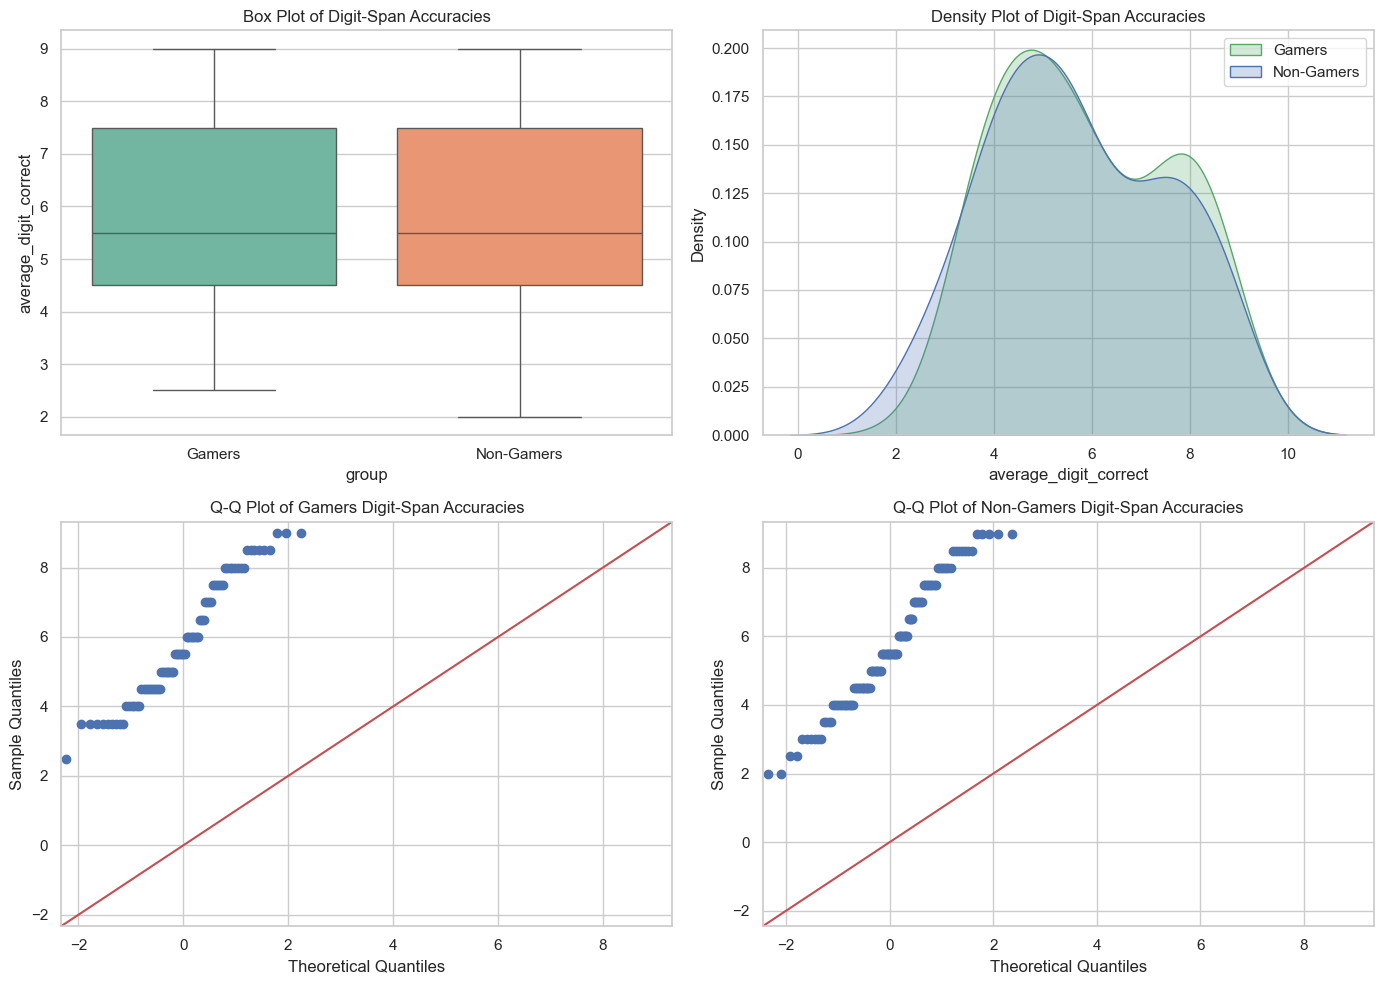

In [119]:
from scipy.stats import shapiro, levene, f_oneway

def check_normality(data):
    stat, p = shapiro(data)
    print(f'\t Statistics = {stat:.3f}, p = {p:.3f}')
    if p > 0.05:
        print("Data follows a normal distribution.")
    else:
        print("Data does not follow a normal distribution.")

def check_variances(data1, data2):
    stat, p = levene(data1, data2)
    print(f'\nLevene’s Test:\n\t Statistics = {stat:.3f}, p = {p:.3f}')
    if p > 0.05:
        print("Variances are equal.")
    else:
        print("Variances are not equal.")


print("Gamers Data Normality Test: (Shapiro-Wilk Test)")
check_normality(gamers_data)

print("\nNon-Gamers Data Normality Test: (Shapiro-Wilk Test)")
check_normality(non_gamers_data)

check_variances(gamers_data, non_gamers_data)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.set_theme(style="whitegrid")

sns.boxplot(data=filtered_df, x='group', y='average_digit_correct', ax=axs[0, 0], hue='group', palette="Set2", legend=False)
axs[0, 0].set_xticks([0, 1], ['Gamers', 'Non-Gamers'])
axs[0, 0].set_title('Box Plot of Digit-Span Accuracies')

sns.kdeplot(gamers_data, ax=axs[0, 1], fill=True, color="g", label="Gamers")
sns.kdeplot(non_gamers_data, ax=axs[0, 1], fill=True, color="b", label="Non-Gamers")
axs[0, 1].set_title('Density Plot of Digit-Span Accuracies')
axs[0, 1].legend()

sm.qqplot(gamers_data, line ='45', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot of Gamers Digit-Span Accuracies')

sm.qqplot(non_gamers_data, line ='45', ax=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot of Non-Gamers Digit-Span Accuracies')

plt.tight_layout()
plt.show()

### Conclusions
- **Distribution**: Both gamers and non-gamers' digit-span accuracy data do not follow a normal distribution. Given the non-normal distribution, parametric tests that assume normality (like the independent t-test) are not suitable.
  
- **Variances**: The equality of variances between the two groups suggests that any differences in means can be tested using statistical tests that assume equal variances. However, given the non-normality of data, you would lean towards non-parametric tests that do not require the assumption of normality.

### Next Steps
Given these results, we'll use the Mann-Whitney U test to compare the mean accuracies between gamers and non-gamers. This non-parametric test is appropriate since the data likely does not follow a normal distribution and there are 2 groups.

In [120]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(gamers_data, non_gamers_data, alternative='two-sided')

print('Mann-Whitney U Test:\n\t Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05  
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Mann-Whitney U Test:
	 Statistics=4468.500, p=0.579
Same distribution (fail to reject H0)


### Conclusion

Based on the Mann-Whitney U test, there is no evidence to suggest a difference in digit-span memory task performance between gamers and non-gamers. 